In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def smoothstep(x):
    return 3 * x**2 - 2 * x**3

def inverse_smoothstep(y):
    return 0.5 - np.sin(np.arcsin(1 - 2 * y) / 3)

def tone_map(image):
    # Normalize the image to the range [0, 1]
    image_normalized = image.astype(np.float32) / 255.0

    # Apply the smoothstep function to the normalized image
    tone_mapped_image = smoothstep(image_normalized)

    # Convert the tone-mapped image back to the range [0, 255]
    tone_mapped_image *= 255
    tone_mapped_image = tone_mapped_image.astype(np.uint8)

    return tone_mapped_image

if __name__ == "__main__":
    # Replace 'your_image_path.jpg' with the path to your high dynamic range image
    image_path = '/content/LowLightImageEnhancementExample_01.png'
    hdr_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply tone mapping to the HDR image using the smoothstep function
    tone_mapped_image = tone_map(hdr_image)

    # Display the original HDR image and the tone-mapped image
    print("Original Image")
    cv2_imshow(hdr_image)
    print("Tone Mapped Image")
    cv2_imshow(tone_mapped_image)
    output_path = '/content/tone_mapped_image.png'
    cv2.imwrite(output_path, tone_mapped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'astype'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Tone mapping**
The high dynamic range image needs extreme tone mapping and the low dynamic range image is often processed with
an S-shaped curve. The complex edge-aware local tone mapping
can be performed, although reverse engineering operations are
difficult. Then a simple “smoothstep”, curve is performed
as tone mapping and we use the inverse of that curve to generate
synthetic data.

In [ ]:
from PIL import Image
import numpy as np

def gamma_compression(x, epsilon=1e-8):
    # Gamma compression: Γ(x) = max(x, 𝜖)^(1/2.2)
    return np.maximum(x, epsilon) ** (1/2.2)

def inverse_gamma_compression(y, epsilon=1e-8):
    # Inverse gamma compression: Γ^(-1)(y) = max(y, 𝜖)^(2.2)
    return np.maximum(y, epsilon) ** 2.2

# Open the image
image_path = '/content/tone_mapped_image.png'
image = Image.open(image_path)
image2 = Image.open(image_path).copy()  # Create a copy of the image to modify
image3 = Image.open(image_path).copy()  # Create a copy of the image to modify

# Get the dimensions of the image
width, height = image.size

# Access each pixel in the image
for y in range(height):
    for x in range(width):
        # Get the pixel value at coordinates (x, y)
        pixel_value = image.getpixel((x, y))

        gamma_compressed_value = gamma_compression(pixel_value)
        image2.putpixel((x, y),int(gamma_compressed_value))

        inverse_gamma_compressed_value = inverse_gamma_compression(gamma_compressed_value)
        image3.putpixel((x, y),int(inverse_gamma_compressed_value))

        print("Original Pixel Value:", pixel_value)
        print("Gamma Compressed Value:", gamma_compressed_value)
        print("Inverse Gamma Compressed Value:", inverse_gamma_compressed_value)

# Save the modified image
output_path = '/content/gamma_compressed_image.png'
image2.save(output_path)
# Save the modified image
output_path2 = '/content/inverse_gamma_compressed_image.png'
image3.save(output_path2)
# Close the images
image.close()
image2.close()
image3.close()


Streaming output truncated to the last 5000 lines.
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 255
Gamma Compressed Value: 12.41314704969278
Inverse Gamma Compressed Value: 255.00000000000006
Original Pixel Value: 2

Inverse gama commpresed image 


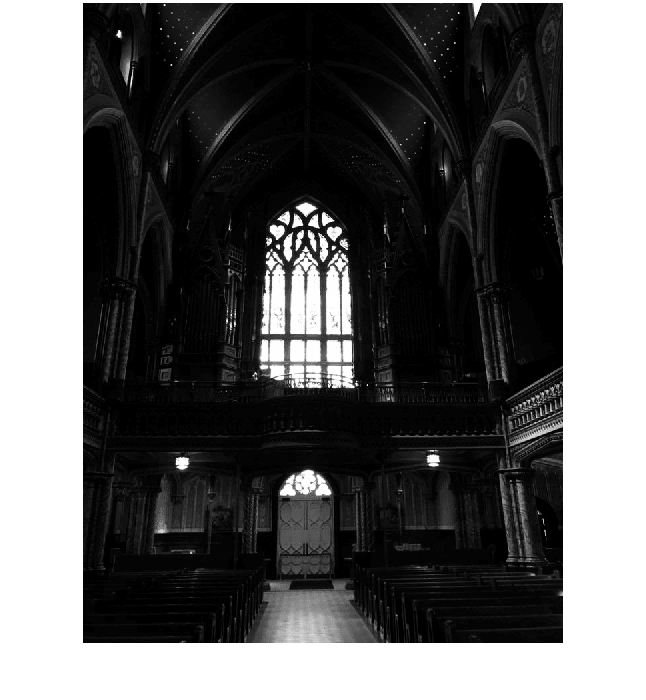

gama compressed image


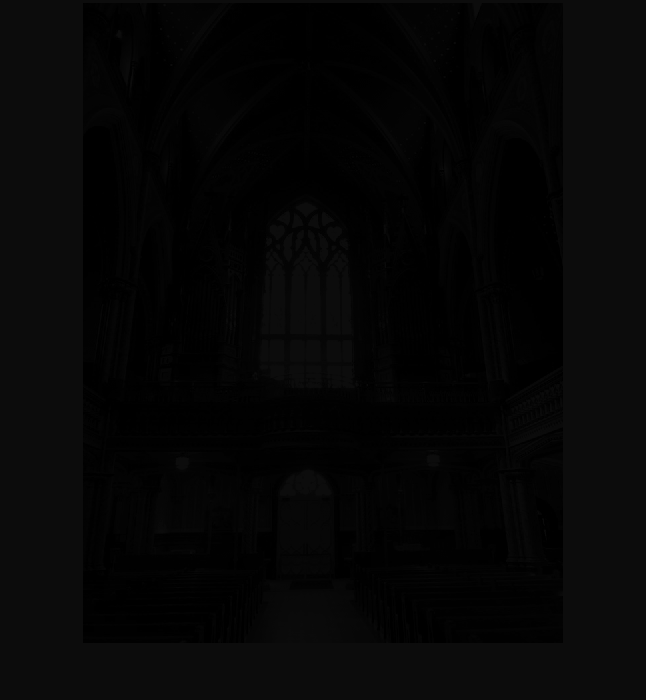

In [ ]:
import cv2
image_path = '/content/inverse_gamma_compressed_image.png'
image_path2='/content/gamma_compressed_image.png'
print("Inverse gama commpresed image ")
image = cv2.imread(image_path)
cv2_imshow(image)

print("gama compressed image")
image2 = cv2.imread(image_path2)
cv2_imshow(image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Gamma compression**
Gamma compression is commonly used to allocate more bits
of dynamic range for the low-intensity pixel since humans are
sensitive to gradations in the dark area of the image

In [ ]:
import numpy as np
import cv2

def matrix_multiplication(mat1, mat2):
    # Matrix multiplication
    return np.dot(mat1, mat2)

def matrix_inversion(mat):
    # Matrix inversion
    return np.linalg.inv(mat)

def remove_color_correction(rgb_image, color_correction_matrices):
    # Randomly sample convex combinations of color correction matrices
    random_weights = np.random.rand(len(color_correction_matrices))
    random_weights /= np.sum(random_weights)

    # Compute the combined color correction matrix
    combined_color_correction_matrix = np.zeros_like(color_correction_matrices[0])
    for i, weight in enumerate(random_weights):
        combined_color_correction_matrix += weight * color_correction_matrices[i]

    # Apply the inverse of the combined color correction matrix to remove the effect of color correction
    inverse_combined_color_correction_matrix = matrix_inversion(combined_color_correction_matrix)
    raw_data = matrix_multiplication(rgb_image, inverse_combined_color_correction_matrix)

    return raw_data

if __name__ == "__main__":
    # Example usage:
    # Replace 'your_rgb_image' with the RGB image to remove color correction
    # Replace 'your_color_correction_matrices' with a list of color correction matrices (3x3) used by the cameras.
        # Replace 'your_image.jpg' with the path to your input RGB image
    image_path = '/content/LowLightImageEnhancementExample_01.png'

    # Load the image using OpenCV
    rgb_image = cv2.imread(image_path)

    # Make sure the image is in the correct format (3x3 shape, float or int data type)
    rgb_image = np.asarray(rgb_image, dtype=np.float32)

    # Replace 'your_color_correction_matrices' with a list of color correction matrices (3x3) used by the cameras.
    # Example: color_correction_matrices = [np.array([[1.1, 0, 0], [0, 1.0, 0], [0, 0, 0.9]]), ...]

    color_correction_matrices = [np.array([[1.1, 0, 0], [0, 1.0, 0], [0, 0, 0.9]]),
                                 np.array([[1.2, 0, 0], [0, 1.1, 0], [0, 0, 1.0]]),
                                 np.array([[1.0, 0, 0], [0, 1.3, 0], [0, 0, 1.1]])]

    rgb_image =cv2.imread(image_path)   # Replace this with the actual RGB image
    color_correction_matrices = [np.random.rand(3, 3), np.random.rand(3, 3), np.random.rand(3, 3)]  # Replace this with the actual color correction matrices

    raw_data = remove_color_correction(rgb_image, color_correction_matrices)
    print("RAW Data after removing color correction:")
    print(raw_data)


RAW Data after removing color correction:
[[[155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  ...
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]]

 [[155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  ...
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]]

 [[155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  ...
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]]

 ...

 [[155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  [155.66323012 332.85252121 111.01413618]
  ...
  [155.66323012 332

**Color correction**
Generally, the color filters in the camera sensor do not match
the spectra for the sRGB color space. Therefore, the traditional
ISP uses a 3 × 3 color correction matrix to transform an image
from “camera space” RGB to sRGB

To produce
our RAW data, we randomly sample convex combinations of
color correction matrixes and apply the inverse of these matrixes
to remove the effect of color correction

**Inverse white balance**
The white balance algorithm is expected to alleviate some of
the effects of illumination and produce an image like as under
“neutral” illumination

In digital photography, RAW images are captured directly from the camera's sensor and **contain unprocessed data**. These images often suffer from color **imbalances** due to lighting conditions, sensor characteristics, or other factors. White balance is the process of correcting these color imbalances to ensure that the colors in the image appear natural and accurate.

In [ ]:
import numpy as np

# Define a function to sample inverse gains from the empirical distribution
def sample_inverse_gains(num_samples):
    # Replace the following lines with the actual white balance metadata from the Darmstadt dataset
    # Assuming that you have the inverse gains for the red and blue channels as separate lists
    red_inverse_gains = np.random.uniform(0.5, 2.0, num_samples)
    blue_inverse_gains = np.random.uniform(0.5, 2.0, num_samples)
    return red_inverse_gains, blue_inverse_gains

# Define a function to apply the cubic transformation
def cubic_transformation(x, g, t=0.9):
    alpha = ((x - t) / (1 - t))**2
    return (x / g, (1 - alpha) * (x / g) + alpha * x)

# Define a function to apply the highlight-preserving linear function
def highlight_preserving_linear_function(x, g, t=0.9):
    return np.where(x <= t, x / g, cubic_transformation(x, g, t)[1])

# Define a function to apply the transformations based on the thresholds and gains
def apply_transformations(data, red_gains, blue_gains, t=0.9):
    transformed_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            for channel in range(data.shape[2]):
                x = data[i, j, channel]
                if channel == 0:  # Red channel
                    inverse_gain = 1.0 / red_gains[i]  # Access red gain for the i-th sample
                elif channel == 2:  # Blue channel
                    inverse_gain = 1.0 / blue_gains[i]  # Access blue gain for the i-th sample
                else:
                    inverse_gain = 1.0  # Green channel has no gain

                # Apply the appropriate transformation based on the threshold and gain
                if inverse_gain > 1.0 or x > t:
                    transformed_data[i, j, channel] = highlight_preserving_linear_function(x, inverse_gain, t)
                else:
                    transformed_data[i, j, channel] = highlight_preserving_linear_function(x, inverse_gain, t)

    return transformed_data


# Assuming you have the RAW data in a 3D NumPy array (height x width x channels)
# Replace the following line with your actual RAW data
raw_data = np.random.rand(100, 100, 3)  # Example: 100x100 RAW data with 3 channels (random data)

# Assuming you have the white balance gains in 2D NumPy arrays (height x width)
# Replace the following line with your actual white balance gains
num_samples = raw_data.shape[0]
red_gains, blue_gains = sample_inverse_gains(num_samples=num_samples)

# Applying the transformations to obtain synthetic data
synthetic_data = apply_transformations(raw_data, red_gains, blue_gains)

print(synthetic_data)

# Now, 'synthetic_data' contains the RAW data after applying the inverse white balance gains and transformations.
# You can now use 'synthetic_data' for further processing or analysis with the white balance corrections applied.


[[[0.65964401 0.64796114 0.13755763]
  [0.7871297  0.61167658 0.13550834]
  [0.89404784 0.14861766 0.75805581]
  ...
  [0.94754528 0.59673229 0.40852123]
  [0.00192423 0.67383272 0.15778161]
  [0.54865277 0.79371214 0.17409684]]

 [[1.12615177 0.10611862 0.58233921]
  [0.91697701 0.42221791 0.32000339]
  [1.04770157 0.91693471 0.66202804]
  ...
  [0.08850894 0.60661531 0.53082061]
  [1.1029938  0.74651208 0.21332463]
  [0.34814047 0.22705982 0.52651372]]

 [[1.29291904 0.55747932 0.61501509]
  [1.01830293 0.17588767 0.06152073]
  [0.58635775 0.01085911 0.96659632]
  ...
  [0.32362989 0.1186781  0.07289492]
  [1.11829131 0.94835747 0.45811244]
  [0.07010184 0.73534236 1.11844775]]

 ...

 [[0.66076662 0.19558679 0.2783888 ]
  [0.98963542 0.24321777 0.16187755]
  [0.6903342  0.23367749 0.37928536]
  ...
  [0.67559703 0.63418196 0.5539101 ]
  [0.18858863 0.20062687 0.58247242]
  [0.93001795 0.99825318 0.29107352]]

 [[1.56983433 0.04883856 1.03537146]
  [0.98809272 0.72786362 0.69785368]


**Inverse digital gain**
The digital gain is commonly used for all image intensities
where the **auto-exposure algorithm** will select each images particular gain. It is difficult to reverse this function for every
image since these auto-exposure methods are usually proprietary “black boxes”. But there is a single global scaling that best
matches the marginal statistics of all image intensities across
both datasets. To obtain this scaling, we assume that our real
and synthetic image intensities are both drawn from different
exponential distributions:
p(x; 𝜆) = 𝜆𝜖−𝜆x,

In [ ]:
import numpy as np
import cv2

def estimate_scale_parameter(data):
    # Calculate the scale parameter (λ) as the inverse of the sample mean
    return 1.0 / np.mean(data)

def generate_inverse_gain(scale, num_samples, std_dev=0.1):
    # Sample the inverse gains from a normal distribution
    # Centered at 1 / scale with a standard deviation of std_dev
    inverse_gains = np.random.normal(1.0 / scale, std_dev, num_samples)
    # Clip the inverse gains to the range [0.5, 1.1]
    inverse_gains = np.clip(inverse_gains, 0.5, 1.1)
    return inverse_gains

# Load a sample image
# Replace 'sample_image.jpg' with the path to your actual sample image
image_path = '/content/LowLightImageEnhancementExample_01.png'
sample_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a 1D array for intensity statistics
image_data = sample_image.flatten()

# Estimate the scale parameter for the image data
scale_image = estimate_scale_parameter(image_data)

# Generate inverse gains using the scaling factor
num_samples = 1000  # Replace this with the desired number of samples
inverse_gains = generate_inverse_gain(scale_image, num_samples)
print(inverse_gains)
# Now, 'inverse_gains' contains the synthetic inverse gains based on the described method.
# You can use these gains for data augmentation during training to match the image intensities.
# You can apply these gains to your synthetic image data using appropriate image processing techniques.


[1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.

**Mosaicing**

The single red, green, and blue color filter built-in camera sensor
cover every pixel and arrange it in a **Bayer pattern as R-G-G-B**.
Demosaicing is a well-studied task, which recovers all **RGB**
measurements to every pixel. To invert this step, we omit two of
its three color values in images for the Bayer filter pattern

<ipython-input-13-bfea2fd966a4>:24: RuntimeWarning: overflow encountered in ubyte_scalars
  green_value = (green_value_top + green_value_bottom) // 2


the Moascing image :


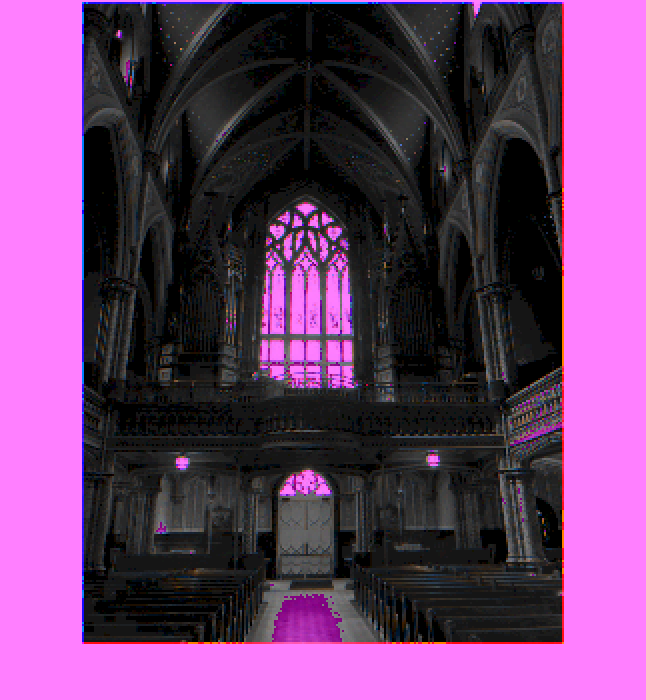

In [ ]:
import numpy as np
import cv2

def invert_demosaicing(bayer_image):
    # Create an empty RGB image with the same shape as the Bayer image
    height, width = bayer_image.shape
    rgb_image = np.empty((height, width, 3), dtype=np.uint8)

    # Pad the image if necessary to ensure the dimensions are divisible by 2
    if height % 2 != 0:
        bayer_image = np.pad(bayer_image, ((0, 1), (0, 0)), mode='edge')
    if width % 2 != 0:
        bayer_image = np.pad(bayer_image, ((0, 0), (0, 1)), mode='edge')

    # Interpolate the missing color channels using the Bayer pattern
    for i in range(0, height - 1, 2):
        for j in range(0, width - 1, 2):
            # Red pixel (R-G-G-B pattern)
            red_value = bayer_image[i, j]

            # Green pixels
            green_value_top = bayer_image[i, j + 1]
            green_value_bottom = bayer_image[i + 1, j]
            green_value = (green_value_top + green_value_bottom) // 2

            # Blue pixel
            blue_value = bayer_image[i + 1, j + 1]

            # Assign the interpolated color values to the RGB image
            rgb_image[i, j] = [red_value, green_value, blue_value]
            rgb_image[i, j + 1] = [red_value, green_value, blue_value]
            rgb_image[i + 1, j] = [red_value, green_value, blue_value]
            rgb_image[i + 1, j + 1] = [red_value, green_value, blue_value]

    # Process the last row and column separately (if needed)
    if height % 2 != 0:
        for j in range(0, width - 1, 2):
            red_value = bayer_image[height - 1, j]
            green_value = bayer_image[height - 1, j + 1]
            blue_value = bayer_image[height - 1, j]
            rgb_image[height - 1, j] = [red_value, green_value, blue_value]
            rgb_image[height - 1, j + 1] = [red_value, green_value, blue_value]

    if width % 2 != 0:
        for i in range(0, height - 1, 2):
            red_value = bayer_image[i, width - 1]
            green_value = bayer_image[i, width - 1]
            blue_value = bayer_image[i + 1, width - 1]
            rgb_image[i, width - 1] = [red_value, green_value, blue_value]
            rgb_image[i + 1, width - 1] = [red_value, green_value, blue_value]

    return rgb_image

# Load the Bayer pattern image
# Replace 'bayer_image.png' with the path to your actual Bayer pattern image
bayer_image_path = '/content/LowLightImageEnhancementExample_01.png'
bayer_image = cv2.imread(bayer_image_path, cv2.IMREAD_GRAYSCALE)

# Invert the demosaicing step and get the RGB image
rgb_image = invert_demosaicing(bayer_image)

# Display the RGB image

print("the Moascing image :")
cv2_imshow( rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


photons
are converted into electrons through photoelectric conversion,
amplification or reduction through analog gain, and then output
RAW images through digital-to-analog conversion

**Noise model**
the process of camera imaging is divided
into multiple stages. Shot noise will be introduced during photoelectric conversion, read-in noise, quantization noise etc. There
is also line noise depending on how the camera reads out the
pixels. Noise and RAW image data can be represented by the
following formula:
D = KI + N

In [ ]:
import numpy as np

def simulate_photon_shot_noise(intensity, gain):
    # Compute the total photoelectric conversion charges (I) using the incident light intensity
    total_conversion_charges = intensity

    # Simulate photon shot noise using the Poisson distribution
    photon_shot_noise = np.random.poisson(total_conversion_charges)

    # Apply the system gain to the photon shot noise
    photon_shot_noise *= gain

    return photon_shot_noise

# Example usage:
# Assuming the incident light intensity is 100 and the total system gain is 1.5
incident_light_intensity = 100
total_system_gain = 1.5

photon_shot_noise = simulate_photon_shot_noise(incident_light_intensity, total_system_gain)
print("Photon Shot Noise:", photon_shot_noise)


Photon Shot Noise: 120.0


In [ ]:
import numpy as np

# Parameters for the example
num_black_frames = 10
frame_height = 723
frame_width = 646

# Generate example black frames
black_frame_data = []
for _ in range(num_black_frames):
    # Create a random noise pattern for each dark frame
    dark_frame = np.random.randint(0, 16, size=(frame_height, frame_width), dtype=np.uint8)

    # Add the dark frame to the black_frame_data list
    black_frame_data.append(dark_frame)

# Convert black_frame_data list to a NumPy array
black_frame_data = np.array(black_frame_data)

# Save the black frame data to a file for future use
np.save('black_frame_data.npy', black_frame_data)


In [ ]:
import numpy as np
import cv2

def simulate_noisy_raw_image(normal_light_image, total_gain, black_frame_data):
    # Simulate noise-free RAW image data under low brightness
    r = 2  # You can adjust this factor as needed
    low_brightness_image = normal_light_image / r

    # Add Poisson noise to the low brightness image
    poisson_noise = np.random.poisson(low_brightness_image / total_gain) * total_gain
    noisy_image = low_brightness_image + poisson_noise

    # Add real dark light noise from the black frame
    selected_black_frame = black_frame_data[np.random.randint(0, len(black_frame_data))]
    noisy_raw_image = noisy_image + selected_black_frame

    return noisy_raw_image

# Load the noise-free RAW image data captured under normal lighting (M1)
# Replace 'normal_light_image.png' with the path to your actual noise-free image
normal_light_image_path = '/content/LowLightImageEnhancementExample_02.png'
normal_light_image = cv2.imread(normal_light_image_path, cv2.IMREAD_GRAYSCALE)

# Load the black frame data (B)
# Replace 'black_frame_data.npy' with the path to your actual black frame data file
black_frame_data = np.load('black_frame_data.npy')

# Set the total gain of the system (K) - obtain this from the calibration curve or camera specifications
total_gain = 1.5  # Replace with the actual total gain value

# Generate the noisy RAW image data (M4)
noisy_raw_image = simulate_noisy_raw_image(normal_light_image, total_gain, black_frame_data)

# Save or process the noisy RAW image data as needed
cv2.imwrite('/content/noisy_raw_image.png', noisy_raw_image)



True

Noise raw Image :


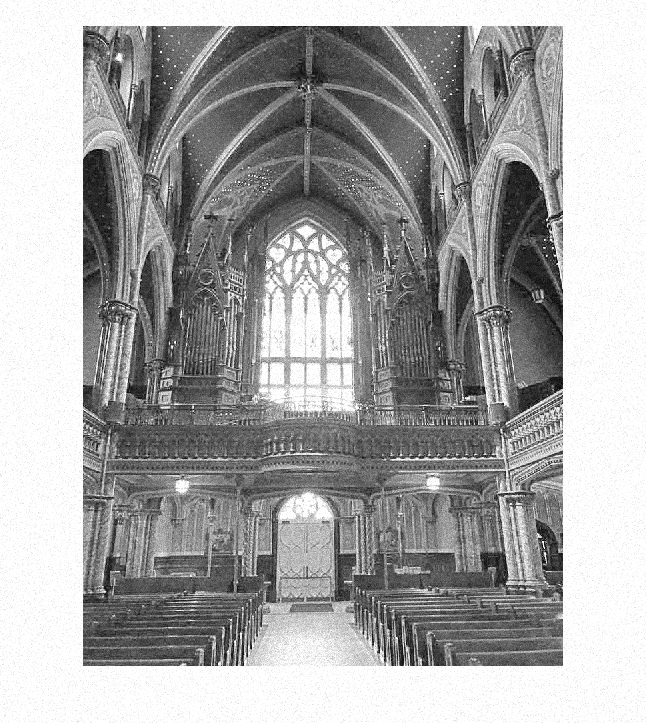

In [ ]:
import cv2
image_path = '/content/noisy_raw_image.png'

print("Noise raw Image :")
image = cv2.imread(image_path)
cv2_imshow(image)


cv2.waitKey(0)
cv2.destroyAllWindows()

# **Training Phase:**
**Transforming RGB Images into RAW Images: **In this step, normal RGB images are transformed into RAW images using the "unprocessing" method mentioned in Section 3. The "unprocessing" method is a process that aims to reverse the camera processing pipeline and convert the RGB images back into their RAW format. This step is necessary because the training data should be in the RAW format for training the denoising network.

**Synthesizing Dark RAW Images:** Once the RAW images are obtained, the proposed method is used to synthesize dark RAW images from the clear RAW images. This synthesis involves adding noise or manipulating the RAW data to create a low-light or dark RAW image that represents images captured in low-light conditions.

**Training the Denoising Network:** After obtaining the clear RAW images and the corresponding dark RAW images, a convolutional neural network (U-Net) is trained to implement a dark RAW to clear RAW mapping. The U-Net architecture is used as it can effectively handle multi-scale features and is robust for image restoration tasks.

**Transforming Clear RAW Images into RGB Images:** The clear RAW images generated by the network are transformed into RGB images using the "Rawpy" Python library. The "Rawpy" library is commonly used to process RAW images and convert them to RGB images.

# **Testing Phase:**
**Denoising on Clear RAW Images:** During the testing phase, the trained denoising network takes clear RAW images as input and produces denoised versions of these images as output. This process helps remove noise and enhance the quality of the clear RAW images.

**Transforming Denoised RAW Images into RGB Images:** The denoised RAW images are transformed into RGB images using the "Rawpy" Python library. This step is necessary to obtain the final RGB images, which can be used for downstream tasks such as object detection and image segmentation.

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to preprocess the image for MobileNetV2
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_resized = cv2.resize(image, (224, 224))   # Resize to 224x224
    image_array = preprocess_input(np.expand_dims(image_resized, axis=0))  # Preprocess
    return image_array, image

# Function to classify image and return predictions
def classify_image(model, image_array):
    predictions = model.predict(image_array)
    decoded_predictions = decode_predictions(predictions, top=5)[0]  # Top 5 predictions
    return decoded_predictions

# Function to display image and predictions
def display_image_with_predictions(image, predictions, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print("Top 5 Predictions:")
    for (i, (imagenet_id, label, score)) in enumerate(predictions):
        print(f"{i+1}: {label} ({score:.2f})")

# Load and classify both original and enhanced images
original_image_path = "path_to_your_original_image.jpg"
enhanced_image_path = "path_to_your_enhanced_image.jpg"

# Preprocess images
original_image_array, original_image = load_and_preprocess_image(original_image_path)
enhanced_image_array, enhanced_image = load_and_preprocess_image(enhanced_image_path)

# Classify images using MobileNetV2
original_predictions = classify_image(model, original_image_array)
enhanced_predictions = classify_image(model, enhanced_image_array)

# Display original and enhanced images with predictions
display_image_with_predictions(original_image, original_predictions, title="Original Image")
display_image_with_predictions(enhanced_image, enhanced_predictions, title="Enhanced Image")

# Compare number of objects detected (top-5 labels) and accuracy
original_objects = [label for (imagenet_id, label, score) in original_predictions]
enhanced_objects = [label for (imagenet_id, label, score) in enhanced_predictions]

print("\nComparison:")
print(f"Objects in Original Image: {original_objects}")
print(f"Objects in Enhanced Image: {enhanced_objects}")

# Check for common detected objects
common_objects = set(original_objects).intersection(set(enhanced_objects))
print(f"Common Objects: {common_objects}")
